<font size="+5">#08. Hyperparameter Tuning with Cross Validation</font>

- Book + Private Lessons [Here ↗](https://sotastica.com/reservar)
- Subscribe to my [Blog ↗](https://blog.pythonassembly.com/)
- Let's keep in touch on [LinkedIn ↗](www.linkedin.com/in/jsulopz) 😄

# Load the Data

> - We take some dataset from the _[Machine Learning Data Repository UCI](https://archive.ics.uci.edu/ml/datasets/adult)_
> - The aim is to predict weather a **person** (rows) `earned>50k` a year or not
> - Based on their **social-demographic features** (columns)

Esta tabla resume la información de personas que ganan más de 50,000 al año o menos. Por tanto, nuestro objetivo es desarrollar un modelo que calcule mejor si una persona gana por encima o por debajo de dicho umbral. La columna a predecir es la última.
>
> PD: You may see the column names & meanings [here ↗](https://archive.ics.uci.edu/ml/datasets/adult).

In [4]:
import pandas as pd
pd.set_option("display.max_columns", None)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df = pd.read_csv(url, header=None, na_values=' ?')
df.rename(columns={14: 'target'}, inplace=True)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


<AxesSubplot:ylabel='5'>

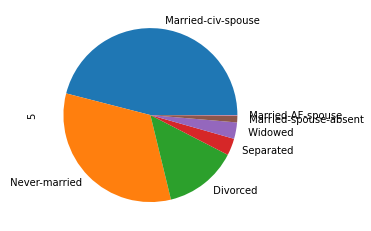

In [7]:
df[5].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='1'>

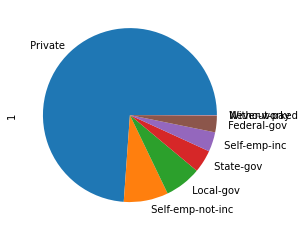

In [9]:
df[1].value_counts().plot(kind='pie')

In [10]:
df=df.dropna()
df=pd.get_dummies(df,drop_first=True)
df.head(10)

,0,2,4,10,11,12,1_ Local-gov,1_ Private,1_ Self-emp-inc,1_ Self-emp-not-inc,1_ State-gov,1_ Without-pay,3_ 11th,3_ 12th,3_ 1st-4th,3_ 5th-6th,3_ 7th-8th,3_ 9th,3_ Assoc-acdm,3_ Assoc-voc,3_ Bachelors,3_ Doctorate,3_ HS-grad,3_ Masters,3_ Preschool,3_ Prof-school,3_ Some-college,5_ Married-AF-spouse,5_ Married-civ-spouse,5_ Married-spouse-absent,5_ Never-married,5_ Separated,5_ Widowed,6_ Armed-Forces,6_ Craft-repair,6_ Exec-managerial,6_ Farming-fishing,6_ Handlers-cleaners,6_ Machine-op-inspct,6_ Other-service,6_ Priv-house-serv,6_ Prof-specialty,6_ Protective-serv,6_ Sales,6_ Tech-support,6_ Transport-moving,7_ Not-in-family,7_ Other-relative,7_ Own-child,7_ Unmarried,7_ Wife,8_ Asian-Pac-Islander,8_ Black,8_ Other,8_ White,9_ Male,13_ Canada,13_ China,13_ Columbia,13_ Cuba,13_ Dominican-Republic,13_ Ecuador,13_ El-Salvador,13_ England,13_ France,13_ Germany,13_ Greece,13_ Guatemala,13_ Haiti,13_ Holand-Netherlands,13_ Honduras,13_ Hong,13_ Hungary,13_ India,13_ Iran,13_ Ireland,13_ Italy,13_ Jamaica,13_ Japan,13_ Laos,13_ Mexico,13_ Nicaragua,13_ Outlying-US(Guam-USVI-etc),13_ Peru,13_ Philippines,13_ Poland,13_ Portugal,13_ Puerto-Rico,13_ Scotland,13_ South,13_ Taiwan,13_ Thailand,13_ Trinadad&Tobago,13_ United-States,13_ Vietnam,13_ Yugoslavia,target_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,37,284582,14,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,49,160187,5,0,0,16,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,52,209642,9,0,0,45,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
8,31,45781,14,14084,0,50,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
9,42,159449,13,5178,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


# Feature Selection

> 1. Class/Labels/Dependent/`Target` `y`
> 2. Independents/Features/Characteristics/`Explanatory` `X`

In [11]:
y=df['target_ >50K']

In [12]:
X=df.drop(columns='target_ >50K')

# Data Preprocessing

In [13]:
from sklearn.model_selection import train_test_split

In [22]:
 X_train, X_test, y_train, y_test = train_test_split(
...     X.values, y.values, test_size=0.33, random_state=42)

# `DecisionTreeClassifier()` with Default Hyperparameters

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [24]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

## Accuracy

> - `model.score()`
>
> In `train` data

In [25]:
dtc.score(X_train,y_train)

1.0

> In `test` data

In [26]:
dtc.score(X_test,y_test)

0.8096242716495881

## Model Visualization

> - We'll use `plot_tree()`, located within `tree` module from `sklearn` library
> - You may use `shift + tab` to ask `Python` how the function `plot_tree()` works

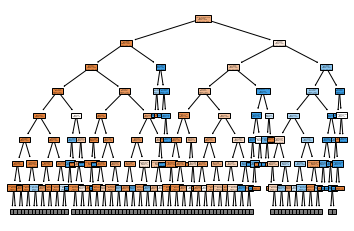

In [27]:
from sklearn.tree import plot_tree
plot_tree(decision_tree=dtc, max_depth=7, feature_names=X.columns, filled=True);

## Interpretation

> - Why the difference on accuracy is so much?

# `DecisionTreeClassifier()` with Custom Hyperparameters

> - The `model` has this hyperparameters ↓

In [33]:
model = DecisionTreeClassifier(max_depth=3)

In [34]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

## 1st Configuration

In [35]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

### Accuracy

> In `train` data

In [36]:
model.score(X_train,y_train)

0.8401623119556612

> In `test` data

In [37]:
model.score(X_test,y_test)

0.8404661442636127

### Model Visualization

> - `plot_tree()`

In [39]:
df.shape

(30162, 97)

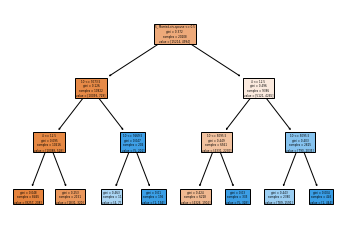

In [38]:
plot_tree(decision_tree=model,max_depth=5,feature_names=X.columns,filled=True);

## 2nd Configuration

In [40]:
model=DecisionTreeClassifier(max_depth=5)

In [41]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [42]:
model.score(X_train,y_train)

0.842735550277118

In [43]:
model.score(X_test,y_test)

0.8404661442636127

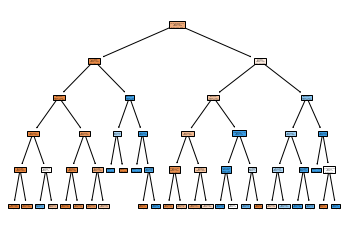

In [44]:
plot_tree(decision_tree=model,max_depth=10,feature_names=X.columns,filled=True);

## 3rd Configuration

In [45]:
model=DecisionTreeClassifier(max_depth=10)

In [46]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [47]:
model.score(X_train,y_train)

0.8697545526524149

In [48]:
model.score(X_test,y_test)

0.8493068113321278

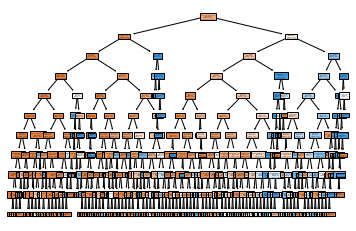

In [49]:
plot_tree(decision_tree=model,max_depth=10,feature_names=X.columns,filled=True);

## 4th Configuration

In [50]:
model=DecisionTreeClassifier(min_samples_leaf=200)

In [51]:
model.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=200)

In [52]:
model.score(X_train,y_train)

0.8472882026920031

In [53]:
model.score(X_test,y_test)

0.8452883263009845

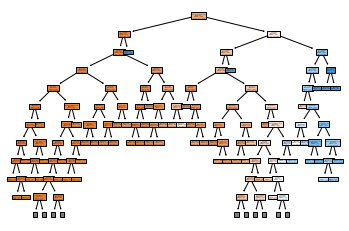

In [54]:
plot_tree(decision_tree=model,max_depth=10,feature_names=X.columns,filled=True);

## 5th Configuration

# `GridSearchCV()` to find Best Hyperparameters

> - How many scores for each fold?

<img src="src/grid_search_cross_validation.png" style="margin-top: 100px"/>

In [55]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()

In [56]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [59]:
cv=GridSearchCV(estimator=dtc,param_grid={'max_depth': [4,5,6,7,8,9,10]}, cv=5, verbose=1)

In [60]:
cv.fit(X_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10]}, verbose=1)

In [61]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=9)

In [62]:
cv.score(X_test,y_test)

0.8496081977094635

# Other Models

## Support Vector Machines `SVC()`

> - https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

In [63]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/efR1C6CvhmE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [39]:
from sklearn.svm import SVC

In [40]:
svm=SVC()

In [64]:
svm.get_params()

NameError: name 'svm' is not defined

In [65]:
cv=GridSearchCV(estimator=svm,param_grid={'C': [0.1,1,100], 'gamma': [1,0.1,0.01], 'kernel': ['rbf','sigmoid']},verbose=1)

NameError: name 'svm' is not defined

In [66]:
cv.fit(X_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10]}, verbose=1)

In [67]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=9)

In [ ]:
cv.score(X_test,y_test)

## `KNeighborsClassifier()`

In [68]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/HVXime0nQeI" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
knc=KNeighborsClassifier()

In [74]:
knc.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [75]:
cv=GridSearchCV(estimator=knc,param_grid={'n_neighbors':[3,5,11,19],'weights':['uniform','distance'],'metric':['minkowski']},cv=2,verbose=1)

In [76]:
cv.fit(X_train,y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski'], 'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [77]:
cv.best_estimator_

KNeighborsClassifier(n_neighbors=19)

In [78]:
cv.score(X_test,y_test)

0.7847096644564999

# Best Model with Best Hyperparameters

# Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [X] Even a model can be bettered
- [X] The goal is to make models that perform a better accuracy on data not seen
    - The banks would like to know if a **future client** will be able to pay the loan
    - Not a past client
    - Unfortunately, we do not have data for future clients
    - So, we fix this with `Data Splitting` into
        - Train
            - Fold Validation
        - Test
- [X] Understand the Machine Learning Applications to businesses
    - To predict if a customer will pay the loan
    - To predict if an athlete will have an injury